In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import math
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

from random import randint

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = torch.tensor([ [randint(-10, 10),randint(-10,10)] for _ in range(1000)]).float()
labels = torch.sum(data,axis=1,keepdim=True).float()
for i in range(10):
    print( [data[i][0].item(), data[i][1].item()], labels[i].item())

[9.0, 1.0] 10.0
[-5.0, 10.0] 5.0
[9.0, 7.0] 16.0
[5.0, 5.0] 10.0
[-7.0, -2.0] -9.0
[4.0, 9.0] 13.0
[-7.0, 5.0] -2.0
[-9.0, -9.0] -18.0
[10.0, -7.0] 3.0
[0.0, 4.0] 4.0


In [3]:
class addingMachine(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.calc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, X):
        return self.calc(X)

In [4]:
def trainStep(model, optimizer, lossFn):

    epochs = 10
    losses = torch.zeros(epochs)

    for epoch in range(epochs):

        loss_val = []

        for i in range(len(data)):

            X, y = data[i], labels[i]

            y_pred = model(X)

            loss = lossFn(y_pred, y)
            loss_val.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses[epoch] = np.mean(loss_val)
    
    with torch.no_grad():
        predictions = model(data)
    training_accuracy = 100*torch.mean( (np.abs(predictions-labels)<1).float() )

    new_X = torch.tensor([ [randint(-10, 10),randint(-10,10)] for _ in range(1000)]).float()
    new_y = torch.sum(new_X,axis=1,keepdim=True)

    with torch.no_grad():
        predictions = model(new_X)
    final_accuracy = 100*torch.mean( (np.abs(predictions-new_y)<1).float() )

    return training_accuracy, final_accuracy.item(), losses
        

In [5]:
model = addingMachine(2,64,1)
optimizer, lossFn =  torch.optim.Adam(model.parameters(),lr=.01), nn.MSELoss()

83.80000305175781 86.0


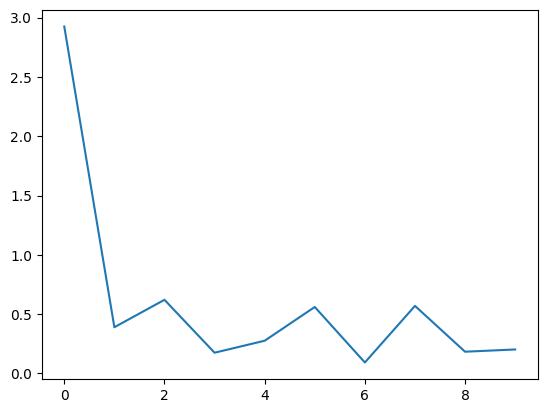

In [6]:
train_acc, test_acc, losses = trainStep(model, optimizer, lossFn)
plt.plot(losses)
print(f'{train_acc} {test_acc}')

In [10]:
all_losses = []
all_train_acc = []
all_test_acc = []

for i in range(10):
    model = addingMachine(2,64,1)
    optimizer, lossFn =  torch.optim.Adam(model.parameters(),lr=.01), nn.MSELoss()
    train_acc, test_acc, losses = trainStep(model, optimizer, lossFn)

    all_train_acc.append(train_acc)
    all_test_acc.append(test_acc)
    all_losses.append(losses)

for i in range(10):
    print(f'Epoch: {i+1} Train: {all_train_acc[i]} Test: {all_test_acc[i]}')

Epoch: 1 Train: 100.0 Test: 100.0
Epoch: 2 Train: 100.0 Test: 100.0
Epoch: 3 Train: 100.0 Test: 100.0
Epoch: 4 Train: 100.0 Test: 100.0
Epoch: 5 Train: 100.0 Test: 100.0
Epoch: 6 Train: 100.0 Test: 100.0
Epoch: 7 Train: 100.0 Test: 100.0
Epoch: 8 Train: 65.80000305175781 Test: 69.70000457763672
Epoch: 9 Train: 100.0 Test: 100.0
Epoch: 10 Train: 100.0 Test: 100.0


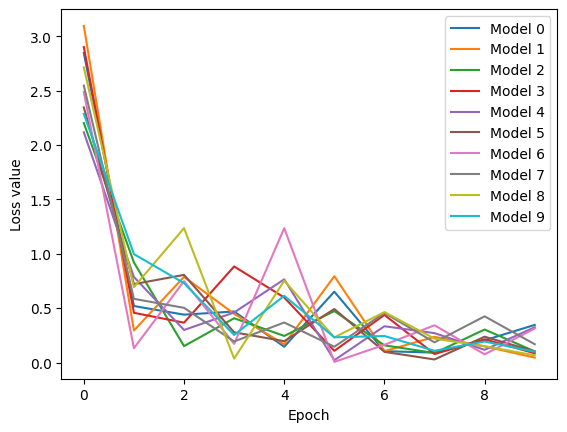

In [15]:
for i in range(10):
    plt.plot(all_losses[i], label = f'Model {i}')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.show()